# Introduction to Python for People with Programming Experience


## Session 2 / 4 - 27.09.2022 9:00 - 13:00

*by Fabian Wilde, Katharina Hoff, Matthis Ebel, Mario Stanke & Felix Becker*

Contact: felix.becker@uni-greifswald.de

<br><br><br>
## Non-interactive Python: 
## Running your code from the command-line

So far, you have used Python interactively in this Jupyter notebook, but often, you'd like to run a long task in the background and you don't need to see intermediate results. You can run Python scripts from the command-line to achieve this behaviour. 
    
**Here, we assume that you're using Linux.** But it works in a similar manner if you're using Windows. If you'd like to run your Python script on the command-line (which is Bash under Linux in the default case), you need to save your script first and then run it with

`python your_script.py` or `python3 your_script.py`


In case you have both, Python 2.x and Python 3.x installed on your system, make sure, you're running the right interpreter using

`which python` or `python --version` 

Of course, you can also directly run your Python script on the command-line treating is it as a Bash script (a script file for the command-line), but putting th "shebang line" 

`#!/usr/bin/python3`

as first line in your Python script to tell Bash which interpreter to use for the file.

Then, you need to make your newly created file **executable** by adding the flag **executable** e.g. with the command

`chmod u+x your_script.py`

You can check the file permission flags in the listing of your directory using

`ls -la scripts`

Then you should be able to simply run your Python script as if it would be a Bash script using

`./your_script.py`        

In the following examples, a special "cell magic" command is used, so that bash scripts and commands can be run within a Jupyter notebook cell.

### Examples:

In [6]:
%%bash
which python3
python3 scripts/hello_world.py

/opt/conda/bin/python3
Hello World from the console!


Or directly run your python script as it would be a bash script or native executable, after you have set the executable file flag:

In [7]:
%%bash
ls -la scripts/
chmod u+x scripts/hello_world2.py
./scripts/hello_world2.py

total 24
drwxr-xr-x 2 jovyan root 4096 Aug 17 07:57 .
drwxrwxr-x 6 jovyan root 4096 Aug 23 13:09 ..
-rwxr--r-- 1 jovyan root  873 Aug 17 07:57 argparse_example.py
-rwxr--r-- 1 jovyan root  101 Aug 17 07:57 cli_args.py
-rwxr--r-- 1 jovyan root   58 Aug 17 07:57 hello_world2.py
-rw-r--r-- 1 jovyan root   39 Aug 17 07:57 hello_world.py
Hello World from the console!


We check what <i>hello_world2.py</i> contained by printing its file content with the command <i>cat</i>:

In [8]:
%%bash
cat scripts/hello_world2.py

#!/usr/bin/python3
print("Hello World from the console!")


## Handling of command-line arguments 
<br>
<font size="3">
Very often, it's the case that you'd like to run your Python script, but with slightly different parameters or paths with files to work on. It would be annoying to make the required changes every time in your Python code.<br><br>
Luckily, you can easily handle given command-line arguments in Python and work with them in your script. <b>The most basic option is to use the builtin library <i>sys</i> and the provided list <i>argv</i>. If any command-line argument was given to run your Python script, it will appear in <i>argv</i>.%%bash
cat scripts/cli_args.py
</font>

<font size="3">Let's check first the content of the little example script:</font>

In [9]:
%%bash
cat scripts/cli_args.py

#!/usr/bin/python3

import sys

print("I got the following command-line arguments:")
print(sys.argv)


Then we run it giving various command-line arguments:

In [10]:
%%bash 

# modifies file permission flags
chmod u+x scripts/cli_args.py

# run it without any command-line argument
./scripts/cli_args.py

# run it with one command-line argument
./scripts/cli_args.py --test1

# run it with multiple command-line arguments
./scripts/cli_args.py --test1 --test2 --test3

I got the following command-line arguments:
['./scripts/cli_args.py']
I got the following command-line arguments:
['./scripts/cli_args.py', '--test1']
I got the following command-line arguments:
['./scripts/cli_args.py', '--test1', '--test2', '--test3']


<font size="3">
    <b>A more convenient option to handle (define and check) command-line arguments is the module <a href="https://docs.python.org/3/library/argparse.html"><i>argparse</i></a></b>.<br><br> With <i>argparse</i> you can easily define expected mandatory or optional command-line arguments for your scripts with built-in checking of the user input. You can even define nice description and help texts for your parameters to help others to use your scripts later independently.
</font>

In [11]:
%%bash

# modifies file permission flags
chmod u+x scripts/argparse_example.py

# list file content
cat scripts/argparse_example.py

#!/usr/bin/python3

# import the argparse module
import argparse

# creating the parser
parser = argparse.ArgumentParser(description='Argparse example')

# add a command-line argument
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                   help='integers to sum up')

# adds a command-line argument which triggers the summations of the previous integers
parser.add_argument('--sum', dest='sum', action='store_const',
                   const=sum, default=max,
                   help='sums the integers')

# invoke parsing (processing) of the arguments
args = parser.parse_args()

# the processed arguments are stored as attributes in the argparse object !
# attributes of object are accessed using the dot-operator.
print("Content of args.integers:")
print(args.integers)
print("Result of argument processing:")
print(args.sum(args.integers))


If we now attempt to run the script without command-line arguments, we get an error and argparse gives us a hint what we have done wrong:

In [12]:
%%bash
./scripts/argparse_example.py

usage: argparse_example.py [-h] [--sum] N [N ...]
argparse_example.py: error: the following arguments are required: N


CalledProcessError: Command 'b'./scripts/argparse_example.py\n'' returned non-zero exit status 2.

Argparse provides a nice help function when the argument *-h%%bash
./scripts/argparse_example.py -h* is used:

In [13]:
%%bash
./scripts/argparse_example.py -h

usage: argparse_example.py [-h] [--sum] N [N ...]

Argparse example

positional arguments:
  N           integers to sum up

optional arguments:
  -h, --help  show this help message and exit
  --sum       sums the integers


In [14]:
%%bash
./scripts/argparse_example.py 1 2 3 --sum

Content of args.integers:
[1, 2, 3]
Result of argument processing:
6


<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b> Write your own script evaluating command-line arguments and run it on the command-line yourself. Either simply use the builtin <i>os.argv</i> variable or use the <i>argparse</i> module if you feel already comfortable enough.<br><br>
<b>Simply create a new Python script locally using a text editor or within the Spyder IDE (which is part of the Anaconda distribution) and upload it in the subfolder scripts (or elsewhere and modify then the file path).</b>
</div>
    
<b>Try to run it yourself here:</b></font>

In [ ]:
%%bash
# replace "your_script" with your filename, may also change the file path
chmod u+x scripts/your_script.py
./scripts/your_script.py

<br><br><br>
## Importing Modules and Namespaces

Structuring the code in functions which can be easily reused and maintained is the first step to achieve cleaner and leaner code. Nevertheless, in big Python projects, it would result in not really well readable code and collaborating on a common project would be difficult, if all the code would be in one single file. Nowadays Python projects are therefore organised in modules, allowing to distribute parts of the code over multiple files as well. We have already imported modules/packages several times to use standard or 3rd party functions in the examples. 
    
The figure below shows an exemplaric project directory structure organized in modules and submodules:
    
<div align="center">
    <img src="img/absolute-import.jpg" width="40%">
</div>

<font size="2"><i>Source: <a href="https://www.geeksforgeeks.org/absolute-and-relative-imports-in-python/">https://www.geeksforgeeks.org/absolute-and-relative-imports-in-python/</a></i></font>
<br><br>

**In order to use an existing (3rd party) module in your new script or project, you need to import the module using**
    
`import module_name`
    
**or define a shorter alias for the module name, if it is too long when used in the code:**
    
`import module_name as alias`

**You can also import a specific class or function from module:**

`from module_name import function_name`

`from module_name import function_name as alias`

**You can also further specifiy an *absolute path* to the submodule (or the file) to import a specific class or function from:**

`from module_name.submodule_name.file_name import function_name`

Related to the project structure above, we could use the statement:

`from pkg2.subpkg1.module5 import fun3`

to specify an *absolute import* path. However, absolute imports are discouraged to use when the directory structure is very large.

A relative import with respect to the project structure in the figure above may be defined using

`from .subpkg1.module5 import fun3`
    
The best practice in Python regarding imports can be found in the official Python style guide <a href="https://www.python.org/dev/peps/pep-0008/#imports">PEP8</a>. 

The most important best practices are:

- import statements should be located at the beginning of your script.
- import statements should be sorted in alphabetical order for their module names.
- standard library imports before 3rd party imports.

### Examples:

In [16]:
# standard library imports first
# use for each import a new line
import math
import os

# the most popular example to use numpy
# imports numpy and sets the namespace to the alias "np"
# the module content is then accessible via the alias
import numpy as np

# the most popular example to plot/visualize data
from matplotlib import pyplot as plt

# import specific class from module
from tqdm import tqdm

<font size="3"><b>You can check the path, version and short documentation of a module using the module attributes:</b></font>

In [30]:
# the hidden attribute __version__ contains the module version
print(np.__version__)
# the hidden attribute __path__ contains the module path or location
print(np.__path__)
# the hidden attribute __doc__ contains a short documentation
# or description of the module, the so-called docstring
print(np.__doc__[:200], "... (more text follows) ...")

1.19.5
['/opt/conda/lib/python3.9/site-packages/numpy']

NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use t ... (more text follows) ...


You can also import your own modules (python files):

In [2]:
from scripts import hello_world3 as hw3 #scripts is a folder in our local directory structure

hw3.useful_function()

Hello World from your module!


<div class="alert alert-block alert-success"><b>Exercise:</b> Implement a simple pipeline called <i>hash</i> consisting of 3 functions that modify a user input (a string). Each function should be in its own module (python file) and the files should be imported here. Think about arguments and return values of each function. 
<br>
The 3 stand-alone functions should do:
    
<ol type = "1">
<li>Convert all characters in the string to upper case. Return the capitalized string.</li>
<li>Replace all characters with their respective ASCII code (function <i>ord</i>). Return a list of numbers.</li>
<li>Sum up all numbers in the list and return the result.</li>
</ol>

Name the 3 modules appropriately according to their roles. For example:

<ol type = "1">
<li>stringmod.py - Contains functions that modify strings in very specific ways.</li>
<li>convert.py - Contains functions that convert strings to other things that might be useful or not.</li>
<li>mymath.py - Contains simple arithmetric functions that operate on lists.</li>
</ol>
    
Try to use list comprehension and other things you already learned to keep your code as short as possible.
</div>

In [4]:
#YOUR imports here

user_string = "I don't have enough € for this coffee!!"

#YOUR CODE HERE

In [5]:
#example solution
def stringmod(s):
    s_mod = "".join([c.upper() for c in s])
    return s_mod

def convert(s):
    return [ord(c) for c in s]

def my_sum(L):
    return sum(L)

s_mod = stringmod(user_string)
L = convert(s_mod)
x = my_sum(L)

print("User string:", user_string)
print("Upper case:", s_mod)
print("Codes:", L)
print("Sum:", x)

User string: I don't have enough € for this coffee!!
Upper case: I DON'T HAVE ENOUGH € FOR THIS COFFEE!!
Codes: [73, 32, 68, 79, 78, 39, 84, 32, 72, 65, 86, 69, 32, 69, 78, 79, 85, 71, 72, 32, 8364, 32, 70, 79, 82, 32, 84, 72, 73, 83, 32, 67, 79, 70, 70, 69, 69, 33, 33]
Sum: 10788


<br><br><br>
## Some popular Python Libraries (3rd party Modules)

<br>
<font size="3">
The most popular Python libraries which you will use yourself sooner that later are <br>
<ul>
<li><b><a href="https://numpy.org/">numpy</a>:</b><br>Numpy is one of the most widely used Python libraries. It offers fast handling and efficient storage of bigger amounts of numerical data in numpy arrays as well as a variety of useful functions to readin various data file formats.</li><br>
<li>
<b><a href="https://matplotlib.org/">matplotlib</a>:</b><br>Matplotlib is the most common Python library for data visualization. The library <a href="https://seaborn.pydata.org/">seaborn</a> builds on matplotlib and offers more beautiful plots and more sophisticated plot types for statistics.
</li><br>
    <li>
        <b><a href="https://pandas.pydata.org/">Pandas</a>:</b><br>Pandas is a library for chart data visualization and also for analysis and handling of large amounts of data. It became most popular for time series analysis and is also commonly used in finance.
    </li><br>
    <li>
     <b><a href="https://www.scipy.org/">scipy</a>:</b><br>Scipy is a general purpose library for science and engineering offering mostly functionalities for signal analysis, filtering and regression.
    </li><br>
        <li>
     <b><a href="https://www.statsmodels.org/">statsmodels</a>:</b><br>As the name implies, the library Statsmodels offers a big variety of statistical models and tests for your data.
    </li><br>
    <li>
     <b><a href="https://scikit-image.org/">scikit-image</a>:</b><br>Scikit-image offers functionalities for automatic image processing, enhancement and segmentation.
    </li><br>
     <li>
     <b><a href="https://scikit-learn.org/">scikit-learn</a>:</b><br>Scikit-learn offers a variety of machine learning models via keras as well as funtions for statistical tests and data fitting routines.
    </li><br>
     <li>
     <b><a href="https://www.tensorflow.org/">tensorflow</a>:</b><br>Tensorflow is the most popular machine learning library developed mostly by Google besides the competing <a href="https://pytorch.org/">pytorch</a> by Facebook.
    </li>
</ul>
</font>

## How to list installed modules and install new modules in Python

Often you would like to use the functionality of a 3rd-party module, but the module is not installed. In most Python environments, a package manager is used to administer the installed modules. 

In most cases, this is either <a href="https://docs.python.org/3/installing/index.html">pip</a> or if you use the Anaconda environment, it will be <a href="">conda</a> and pip.

`pip` (Package Installer for Python) downloads and installs packages and their dependencies from the Python Package Index (PyPI). Everyone can contribute their packages to PyPI and make them available for others.

`conda` is an open source package management system and environment management system that runs on Windows, macOS, Linux and z/OS. It is not limited to Python and installs pre-build packages. 

**In order to check which modules are installed (in your current virtual environment), you can use the command:**

`pip list` or `conda list`

on the command-line prompt in a console or in a cell:

In [ ]:
%%bash
conda list

These are the packages that are installed in the default environment. In our case they are part of the jupyter image that we loaded. 

However, when do you do if you need a package in different versions for different project, or do not want a very specific package that you need only for your very specific project and then never again to appear in the default environment?

A `conda` environment can have different packages and package versions installed. In order to not create a mess using conflicting versions of Python modules or imagine your code only works with specific versions of Python modules, you can create and use different Python environments.

**You can list the currently existing environments using**

In [7]:
%%bash
conda env list

# conda environments:
#
                         /home/jovyan/brain/bin/python/miniconda3
                         /home/jovyan/brain/bin/python/miniconda3.7
                         /home/jovyan/brain/bin/python/miniconda3/envs/bioconda
base                  *  /opt/conda



<font size="3"><b>You can create a new (empty) environment using</b></font>

In [ ]:
%%bash
conda create --name pyprog

<font size="3"><b>You can switch to a specific environment using</b></font>

In [ ]:
%%bash
conda activate new_env

<font size="3"><b>And check on the actual activated environment using</b></font>

In [8]:
%%bash
conda info


     active environment : base
    active env location : /home/mru/anaconda3
            shell level : 1
       user config file : /home/mru/.condarc
 populated config files : 
          conda version : 4.10.3
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __cuda=11.2=0
                          __linux=5.8.0=0
                          __glibc=2.32=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /home/mru/anaconda3  (writable)
      conda av data dir : /home/mru/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/mru/anaconda3/pkgs
                          /home/mru/.con

In [ ]:
%%bash
conda deactivate

<br><br><br>
## Numpy 

Often, you have a file e.g. a CSV file with comma-separated values and you need to convert the content yourself to a table-like datastructure. In this example, we have the famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris dataset</a> (in this case a very popular standard data set in data science). Let's have a look at the first 10 lines of the file:

In [3]:
%%bash
head -n 10 data/iris.csv

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Of course, we could now manually readin the file line by line, but then we would need to process the strings and convert them to a table-like data structure. <b>Luckily, there are already functions in the 3rd party libraries <a href="https://numpy.org/"><i>numpy</i></a> and <a href="https://pandas.pydata.org/"><i>pandas</i></a> that solve this problem.
    
Recently, a <a href="https://www.nature.com/articles/s41586-020-2649-2">paper</a> about the numpy Python package was published in *nature*.

<img src="img/numpy_nature.webp" width="100%">

*Source: <a href="https://www.nature.com/articles/s41586-020-2649-2">https://www.nature.com/articles/s41586-020-2649-2*
    
**Numpy** is a powerful 3rd party package offering the new data type of the <b><i>numpy array</i></b> (numpy.ndarray) with a more powerful and faster implementation in C++ in the background. **Numpy** is essential for scientific programming. In contrast to lists in Python, <b>the size of a numpy array cannot be changed without creating a new array and the best practice is to allocate space in advance by initializing an empty array (e.g. filled with zeros)</b>. Also, the data type of its elements shouldn't differ and the number of elements in each row or column has to be the same, since <b>the numpy array represents a N x M matrix.<br><br>
<b>To sum it up, a numpy array behaves like a "classic" array in other high-level programming languages due to it's precompiled C++ implementation in the background.</b><br><br>
<font size="3">In order to use Numpy, you have to import the package once. Since you will in the following often have to refer to numpy, we assign an alias that is faster to type (np) since programmers are lazy:</font>
</font>

In [15]:
# import num<py with alias np
import numpy as np

### NumPy Array

<br>
<font size="3">A NumPy Array can have many dimensions. Let's start with one (similar to a Python list) and two dimensions (similar to a matrix):</font>

In [16]:
# create a numpy array from a list
arr1 = np.array([1.0,2.35,3.141])
print("type(arr1) =", type(arr1))
print("arr1 =", arr1)
print("arr1.dtype =", arr1.dtype)

type(arr1) = <class 'numpy.ndarray'>
arr1 = [1.    2.35  3.141]
arr1.dtype = float64


In [17]:
# create an 2D array / a 3x3 matrix filled with zeros
arr2 = np.zeros((3,3))
print("type(arr2) =", type(arr2))
print("arr2 = \n", arr2)
print("arr2.dtype =", arr2.dtype)

type(arr2) = <class 'numpy.ndarray'>
arr2 = 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
arr2.dtype = float64


In [18]:
# create a numpy array filled with a specific value
arr3 = np.full((3,2), 2)
print("arr3 = \n", arr3)
print("arr3.dtype =", arr3.dtype)

arr3 = 
 [[2 2]
 [2 2]
 [2 2]]
arr3.dtype = int64


Question: In the above cell, why is the dtype suddenly integer?

In [19]:
# index an array element in a multi-dimensional array
arr2[0,0] = 1
arr2[1,1] = 2
arr2[2,2] = 3
print("type(arr2) =", type(arr2))
print("arr2 = \n", arr2)
print("arr2.dtype =", arr2.dtype)

type(arr2) = <class 'numpy.ndarray'>
arr2 = 
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
arr2.dtype = float64


Sliced indexing follows the same rules as for regular python lists:

In [35]:
#take all elements after the first from the first axis and all elements except the last from the second axis
#returns a "view" into the original array without copying anything
sliced_arr2 = arr2[1:, :-1] 
print("sliced arr2 = \n", sliced_arr2)

sliced arr2 = 
 [[0. 2.]
 [0. 0.]]


In [20]:
# using the attribute "size" of the numpy array is more reliable than using the len() function
# the attribute "shape" contains a tuple with the array or matrix dimensions
print("arr2.size =", arr2.size)
# convention for the shape tuple: (number of rows, number of columns) in case of a 2D array
print("arr2.shape =", arr2.shape)

arr2.size = 9
arr2.shape = (3, 3)


Sometimes you want or need to change the shape of your numpy array using the `reshape` method:

In [32]:
# defines a numpy array with row number unequal column number
arr3 = np.array([[2,3],[3,5],[6,4]])
print("content of arr3:")
print(arr3)

# prints the shape (number of rows, number of columns)
print("shape of arr3:")
print(arr3.shape)

# the same result could be achieved using the reshape method expecting a tuple 
# (total number of elements needs to be the same!)
arr4 = arr3.reshape(2,3)

print("reshaped array:\n", arr4)
print("shape of the reshaped array:", arr4.shape)

content of arr3:
[[2 3]
 [3 5]
 [6 4]]
shape of arr3:
(3, 2)
reshaped array:
 [[2 3 3]
 [5 6 4]]
shape of the reshaped array: (2, 3)


There is also the `transpose` method. Beware that it does *not* the same as `reshape`:

In [33]:
# transposes the array / matrix
arr5 = arr3.T
print("transposed array (rows and columns interchanged):")
print(arr5)

# prints the shape of the transposed array
print("shape of the transposed array:", arr5.shape)

transposed array (rows and columns interchanged):
[[2 3 6]
 [3 5 4]]
shape of the transposed array: (2, 3)


<font size="3"><b>Often you would like to perform computations over an entire row or column of your array (hence your dataset), like:
    </b></font>

In [5]:
# generates a 2D matrix of random floating-point numbers
# np.random.normal generates normally distributed random numbers and expects (mean, standard deviation, size=(a,b))
arr = np.random.normal(0,2,size=(6,8))
print("random number array:")
print(arr)

# sums all values in each column
col_sum = np.sum(arr, axis=0)
#print("row_sum = "+str(row_sum))

# sums all values in each row
row_sum = np.sum(arr, axis=1)
#print("col_sum = "+str(col_sum))

# multiplies all values in each column
col_prod = np.prod(arr, axis=0)
#print("row_prod = "+str(row_prod))

# multiplies all values in each row
row_prod = np.prod(arr, axis=1)
#print("col_prod = "+str(col_prod))

# calculate mean
total_mean = np.mean(arr)
print("Overall mean:"+str(total_mean))
# calculate standard deviation
total_std = np.std(arr)
print("Overall standard deviation:"+str(total_std))

# calculate mean over all elements in a column (iterates over first array dimension)
col_mean = np.mean(arr, axis=0)
print(col_mean)

# calculate mean over all elements in a row (iterates over second array dimension)
col_mean = np.mean(arr, axis=1)
print(col_mean)

random number array:
[[ 0.69155771  1.05404779  2.00053817 -0.64287973 -1.88192273  0.71156505
  -3.30040426 -0.09984976]
 [-1.27785057  1.29422894 -1.55355293  0.27523196  0.44118924  2.45971609
   1.41526056 -0.2544128 ]
 [-1.22906163  0.07217583  1.1266327   0.11870389  2.02426348  2.43643977
  -5.41346238  2.01616514]
 [ 1.14728963 -1.9920876  -4.01950574  1.94603574 -0.41840262  2.70844872
  -2.78285757 -3.30599101]
 [-1.01774104 -0.67308274 -4.28079489  0.93496898  0.49920896 -0.09342604
   0.69135856 -1.0535226 ]
 [-1.19669249  0.45463304 -3.88571074  2.45914936  1.66187442  1.20443317
  -1.5861446  -0.56296328]]
Overall mean:-0.22244172563587483
Overall standard deviation:1.9508043415545768
[-0.4804164   0.03498588 -1.76873224  0.84853503  0.38770179  1.57119613
 -1.82937495 -0.54342905]
[-0.18341847  0.34997631  0.1439821  -0.8396338  -0.62412885 -0.18142764]


<font size="3"><b>Of course, you can also do elementwise manipulations and matrix multiplications (that was one of the original purposes of numpy):</b></font>

In [6]:
arr = np.array([1,2,3,4])
print("arr:")
print(arr)

# e.g multiply each element with value
print("result of arr * 3.141:")
print(arr * 3.141)

# compute the products of two arrays element-wise
arr2 = np.array([5,6,0,1])
print("arr2:")
print(arr2)
result = arr * arr2
print("result of arr * arr2:")
print(result)

# compute the dot or scalar product of two vectors
result = np.dot(arr, arr2)
print("result of arr (dot) arr2:")
print(result)

# more general, compute the product of two matrices
arr = np.array([[1,2],[5,6],[4,2]])
arr2 = np.array([[5,6,7],[2,3,2]])
print("arr:")
print(arr)
print("arr2:")
print(arr2)
result = np.matmul(arr, arr2)
print("result of matmul(arr,arr2):")
print(result)

arr:
[1 2 3 4]
result of arr * 3.141:
[ 3.141  6.282  9.423 12.564]
arr2:
[5 6 0 1]
result of arr * arr2:
[ 5 12  0  4]
result of arr (dot) arr2:
21
arr:
[[1 2]
 [5 6]
 [4 2]]
arr2:
[[5 6 7]
 [2 3 2]]
result of matmul(arr,arr2):
[[ 9 12 11]
 [37 48 47]
 [24 30 32]]


<font size="3"><b>Now back to our CSV file, we can read-in the file using <a href="https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a></b></font>

In [36]:
# print the documentation string of the function
print(np.genfromtxt.__doc__)


    Load data from a text file, with missing values handled as specified.

    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : dtype, optional
        Data type of the resulting array.
        If None, the dtypes will be determined by the contents of each
        column, individually.
    comments : str, optional
        The character used to indicate the start of a comment.
        All the characters occurring on a line after a comment are discarded
    delimiter : str, int, or sequence, optional
        The str

In [37]:
# load data file and convert it to (named) numpy array
iris_data = np.genfromtxt("data/iris.csv", names=True, delimiter=",")
# output just the first 20 rows
print("type(iris_data) = "+str(type(iris_data)))
print("iris_data[:20] = "+str(iris_data[:20]))
#print the guess data types for the columns of the table
print("iris_data.dtype = \n"+str(iris_data.dtype))

type(iris_data) = <class 'numpy.ndarray'>
iris_data[:20] = [(5.1, 3.5, 1.4, 0.2, nan) (4.9, 3. , 1.4, 0.2, nan)
 (4.7, 3.2, 1.3, 0.2, nan) (4.6, 3.1, 1.5, 0.2, nan)
 (5. , 3.6, 1.4, 0.2, nan) (5.4, 3.9, 1.7, 0.4, nan)
 (4.6, 3.4, 1.4, 0.3, nan) (5. , 3.4, 1.5, 0.2, nan)
 (4.4, 2.9, 1.4, 0.2, nan) (4.9, 3.1, 1.5, 0.1, nan)
 (5.4, 3.7, 1.5, 0.2, nan) (4.8, 3.4, 1.6, 0.2, nan)
 (4.8, 3. , 1.4, 0.1, nan) (4.3, 3. , 1.1, 0.1, nan)
 (5.8, 4. , 1.2, 0.2, nan) (5.7, 4.4, 1.5, 0.4, nan)
 (5.4, 3.9, 1.3, 0.4, nan) (5.1, 3.5, 1.4, 0.3, nan)
 (5.7, 3.8, 1.7, 0.3, nan) (5.1, 3.8, 1.5, 0.3, nan)]
iris_data.dtype = 
[('sepal_length', '<f8'), ('sepal_width', '<f8'), ('petal_length', '<f8'), ('petal_width', '<f8'), ('species', '<f8')]


<font size="3"><b>Obviously, the numpy function couldn't properly guess the data type of the last column (just returning a <i>NaN</i> (not an number). But we can correct that:</b></font>

In [68]:
# load data file again with defined data types and column names and 
# convert it to (named) numpy array
iris_data = np.genfromtxt("data/iris.csv", names=True,\
                          dtype=[('sepal_length', np.float32), ('sepal_width', np.float32),\
                                ('petal_length', np.float32), ('petal_width', np.float32),\
                                ('species', "<U16")], delimiter=",")
print("iris_data[:20] = "+str(iris_data[:20]))
#print the guess data types for the columns of the table
print("iris_data.dtype = \n"+str(iris_data.dtype))

iris_data[:20] = [(5.1, 3.5, 1.4, 0.2, 'setosa') (4.9, 3. , 1.4, 0.2, 'setosa')
 (4.7, 3.2, 1.3, 0.2, 'setosa') (4.6, 3.1, 1.5, 0.2, 'setosa')
 (5. , 3.6, 1.4, 0.2, 'setosa') (5.4, 3.9, 1.7, 0.4, 'setosa')
 (4.6, 3.4, 1.4, 0.3, 'setosa') (5. , 3.4, 1.5, 0.2, 'setosa')
 (4.4, 2.9, 1.4, 0.2, 'setosa') (4.9, 3.1, 1.5, 0.1, 'setosa')
 (5.4, 3.7, 1.5, 0.2, 'setosa') (4.8, 3.4, 1.6, 0.2, 'setosa')
 (4.8, 3. , 1.4, 0.1, 'setosa') (4.3, 3. , 1.1, 0.1, 'setosa')
 (5.8, 4. , 1.2, 0.2, 'setosa') (5.7, 4.4, 1.5, 0.4, 'setosa')
 (5.4, 3.9, 1.3, 0.4, 'setosa') (5.1, 3.5, 1.4, 0.3, 'setosa')
 (5.7, 3.8, 1.7, 0.3, 'setosa') (5.1, 3.8, 1.5, 0.3, 'setosa')]
iris_data.dtype = 
[('sepal_length', '<f4'), ('sepal_width', '<f4'), ('petal_length', '<f4'), ('petal_width', '<f4'), ('species', '<U16')]


In [69]:
# access column data with column name
print("iris_data['sepal_length'] = \n"+str(iris_data['sepal_length'][:20]))

iris_data['sepal_length'] = 
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1]


In [70]:
#work with the data
#compute mean of column
mean = np.mean(iris_data['sepal_length'])
#compute standard deviation of column
std = np.std(iris_data['sepal_length'], axis=0)
print("Mean of column sepal_length:" + str(mean))
print("Std of column sepal_length:" + str(std))

# round to n significant digits with np.round
print("Mean of column sepal_length:" + str(np.round(mean,3)))

# or just change the number output format

Mean of column sepal_length:5.8433332
Std of column sepal_length:0.8253013
Mean of column sepal_length:5.843


We now want to explore how to solve a relatively simple task in multiple ways to get a feeling of the variety of tools python proposes to us and an intuition of what to decide for depending on the complexity of the task.

<div class="alert alert-block alert-success"><b>Exercise:</b> We want to count the number of examples we have for each species (e.g. setosa). Try to solve this task...
       <ol type="1">
           <li>using only basic python syntax and a <b>dict</b>.
           <li>using the class <a href="https://docs.python.org/3/library/collections.html#collections.defaultdict">defaultdict</a> from the standard library <b>collections</b>.
           <li>using the <b>==</b> operator and <b>np.sum</b>.
           <li>using the function <a href="https://numpy.org/doc/stable/reference/generated/numpy.unique.html">numpy.unique</a> using the argument <i>return_counts</i>. 
       </ol>
</div>

In [71]:
# YOUR CODE HERE

In [74]:
# example solution
species = iris_data["species"]

# 1
counts = {}
for s in species:
    if s in counts:
        counts[s] += 1
    else:
        counts[s] = 1
print("1.\n", counts)

#2
from collections import defaultdict
counts = defaultdict(int) # values will default to 0
for s in species: 
    counts[s] += 1
print("2.\n", counts)

#3 
#using dictionary comprehension
counts = {s : np.sum(species == s) for s in species}
print("3.\n", counts)

#4 
counts = np.unique(species, return_counts=True)
print("4.\n", counts)

1.
 {'setosa': 50, 'versicolor': 50, 'virginica': 50}
2.
 defaultdict(<class 'int'>, {'setosa': 50, 'versicolor': 50, 'virginica': 50})
3.
 {'setosa': 50, 'versicolor': 50, 'virginica': 50}
4.
 (array(['setosa', 'versicolor', 'virginica'], dtype='<U16'), array([50, 50, 50]))


Lets do short discussion:

1. Which is the most natural and readable attempt in your opinion?
2. Is there a *best* way of solving this task?
3. Do you ever want to use approach 1 over the others?

<font size="3"><div class="alert alert-block alert-success"><b>Optional Exercise:</b> Write a function which loads a file (<b>in this case applied to <i>data/glass.csv<i></b>), print the shape of the resulting array, print the first N rows (adjustable via a function argument), compute and return the means and standard deviations for the data columns and print the results (adjustable via a parameter). The result of <b>numpy.genfromtxt is different in this case since glass.csv does not contain mixed data types. You don't need to specify the column data types in this case.</b><br><br>
    <b>Hint:</b> <b>Use the numpy functions <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html">np.std</a></b> to compute the mean and the standard deviaton. The parameter axis allows to specifiy for which dimension/axis you'd like to perform the computation. So you don't need to use a loop.<br><br>
If you use the keyword argument <b>names = True</b> in numpy.genfromtxt, a named array will be returned where column data can be addressed via the column name defined in the first row of the file.
</div>
    
<b>Try it yourself here:</b></font>

### Example Solution:

In [75]:
import numpy as np  
def process_file(file, n_rows = 10, print_result = True): 
    glass_data = np.genfromtxt(file, delimiter=",", skip_header=1) 
    print(glass_data[:n_rows,:]) 
    means = np.mean(glass_data, axis = 0) 
    stds = np.std(glass_data, axis = 0) 
    if print_result: 
        print("means:"+str(means)) 
        print("stds:"+str(stds)) 
    return means, stds
means, stds=process_file("data/glass.csv", n_rows = 10, print_result = True)

[[1.00000e+00 1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01
  6.00000e-02 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [2.00000e+00 1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01
  4.80000e-01 7.83000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [3.00000e+00 1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01
  3.90000e-01 7.78000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [4.00000e+00 1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01
  5.70000e-01 8.22000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [5.00000e+00 1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01
  5.50000e-01 8.07000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [6.00000e+00 1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01
  6.40000e-01 8.07000e+00 0.00000e+00 2.60000e-01 1.00000e+00]
 [7.00000e+00 1.51743e+00 1.33000e+01 3.60000e+00 1.14000e+00 7.30900e+01
  5.80000e-01 8.17000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [8.00000e+00 1.51756e+00 1.31500e+01 3.6

<br><br><br>
## A short introduction to Pandas

<br>
<font size="3">
Neither NumPy arrays, nor any of the native Python data structures (e.g. lists, dicts, ...) are suitable to handle the data that is typically generated in scientific experiments or by surveys. These are typically tables where one column contains one data type, but different columns may have different data types. As you could see, this is problematic when numpy is used. The solution in Python is to use <a href="https://pandas.pydata.org/">Pandas</a>. Pandas is also most popular for time series data and it also facilitates any statistical evaluation on big data sets.
<br><br>
If we want to use Pandas, we have to import it:
</font>

In [11]:
import pandas as pd

<font size="3">
With Pandas, we can easily import a csv file that had previously been exported from LibreOffice Calc (or similar Office software):
</font>

In [12]:
melon = pd.read_csv('data/melon.csv', sep='\t')
melon

,variety,yield
0,A,25.12
1,A,17.25
2,A,26.42
3,A,16.08
4,A,22.15
5,A,15.92
6,B,40.25
7,B,35.25
8,B,31.98
9,B,36.52


<font size="3">We can play with accessing parts of the melon data set:</font>

In [18]:
print("access lines 1 and 2, all columns:")
# line index is 0-based
# integer-location based indexing for selection by position
print(melon.iloc[1:3,:])

print("access a particular single value as scalar:")
print(melon.iloc[1,1])

print("access a column by name (only first couple of lines):")
# access a whole column with column name as index
print(melon["variety"].head())

print("access multiple columns:")
# access multiple columns with list of column names
print(melon[["variety","yield"]].head())

# like in Numpy we can also use comparisons in Pandas when elements are addressed
print("yields rows of dataframe where yield >37:")
print(melon[melon['yield'] > 37])

# just selects entries matching the condition
print("yields rows of dataframe where variety == D:")
print(melon[melon['variety'] == 'D'])

# count the number of occurrences of this variety
print(melon[melon["variety"] == "C"].count())

# group-by functionality facilitates analyses
# computes the mean for each data group based on column variety which can contain A,B,C or D
print(melon.groupby("variety").mean())
print(melon.groupby("variety").std())

access lines 1 and 2, all columns:
  variety  yield
1       A  17.25
2       A  26.42
access a particular single value as scalar:
17.25
access a column by name (only first couple of lines):
0    A
1    A
2    A
3    A
4    A
Name: variety, dtype: object
access multiple columns:
  variety  yield
0       A  25.12
1       A  17.25
2       A  26.42
3       A  16.08
4       A  22.15
yields rows of dataframe where yield >37:
   variety  yield
6        B  40.25
10       B  43.32
11       B  37.10
yields rows of dataframe where variety == D:
   variety  yield
18       D  28.55
19       D  28.05
20       D  33.20
21       D  31.68
22       D  30.32
23       D  27.58
variety    6
yield      6
dtype: int64
             yield
variety           
A        20.490000
B        37.403333
C        19.491667
D        29.896667
            yield
variety          
A        4.694422
B        3.950497
C        5.560052
D        2.229894


<font size="3">Table-like data in Pandas is stored in DataFrame objects, as we can see, when we check the datatype of our melon dataset:</font>

In [19]:
print(type(melon))

<class 'pandas.core.frame.DataFrame'>


<font size="3">A DataFrame can also be created manually from one or more lists or numpy arrays:</font>

In [20]:
# You can define a name for each column with the parameter columns
# The special thing about Pandas is now that one column can also be defined as index or can
# be explicitly defined. Indexation is a key feature of big databases to speed-up queries.b
df = pd.DataFrame([123,23,54,15,89], columns=["numbers"], index=["a","b","c","d","e"])
df

,numbers
a,123
b,23
c,54
d,15
e,89


<font size="3">A Pandas DataFrame object also has useful attributes like index and columns:</font>

In [21]:
print(df.index)
print(df.columns)
print(df.dtypes)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['numbers'], dtype='object')
numbers    int64
dtype: object


<font size="3">Once defined, in contrast to a numpy array, a DataFrame can be enlarged as well by other columns even if the columns contain a different data type:</font>

In [22]:
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
df

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair


In [23]:
print(df.dtypes)

numbers      int64
floats     float64
names       object
dtype: object


<font size="3">Or we simply add a new row with data providing a new DataFrame, but once an index has been defined, we need to make sure to provide then index values as well:</font>

In [24]:
df.append(pd.DataFrame({'numbers': 273, 'floats': 8.98, 'names': "Florian"}, index=['f']))

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair
f,273,8.98,Florian


<font size="3">The index of a Pandas DataFrame can also be a timestamp which is useful for time series data. Pandas also has some useful built-in plotting functionality. As example, we load the dataset of the DAX share price index and plot it using Pandas.<br><br><b>We need to install a new package first:</b></font>

In [25]:
%%bash
pip install pandas-datareader

<font size="3">Then we need to import the new module and download the data:</font>

In [26]:
# imports a function to download price data from the web
from pandas_datareader import DataReader
dax = DataReader(name='^GDAXI', data_source="yahoo", start='2000-1-1')
# only returns the first N rows (default: 5) of the data table
dax.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961


<font size="3">Pandas Dataframe objects have useful attributes:</font>

In [70]:
# gives the total number of values in the table
print(dax.size)
# gives the number of rows x columns in the table
print(dax.shape)
# gives a complete summary of the table (size, data types)
print(dax.info)
# returns the index column of the table
# it is important to set an index e.g. the timestamp as index for time-series data
print(dax.index)
# returns the values of the table
print(dax.values)
# returns the column names of the table
print(dax.columns)

32952
(5492, 6)
<bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2000-01-03   7159.330078   6720.870117   6961.720215   6750.759766   
2000-01-04   6755.359863   6510.459961   6747.240234   6586.950195   
2000-01-05   6585.850098   6388.910156   6585.850098   6502.069824   
2000-01-06   6539.310059   6402.629883   6501.450195   6474.919922   
2000-01-07   6791.529785   6470.140137   6489.939941   6780.959961   
...                  ...           ...           ...           ...   
2021-08-19  15804.849609  15621.980469  15737.179688  15765.809570   
2021-08-20  15808.040039  15656.280273  15734.679688  15808.040039   
2021-08-23  15930.719727  15799.589844  15930.719727  15852.790039   
2021-08-24  15918.719727  15856.049805  15897.860352  15905.849609   
2021-08-25  15932.620117  15853.320312  15912.849609  15860.660156   

                Volume     Adj Close  
Da

<font size="3">Finally, we directly plot now out of Pandas:</font>

<AxesSubplot:xlabel='Date'>

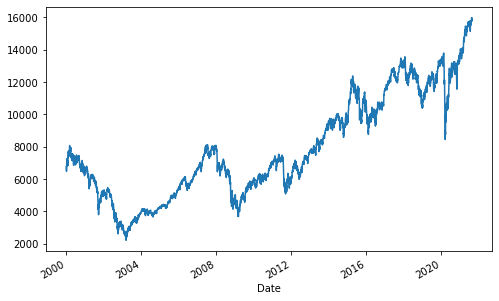

In [28]:
dax["Close"].plot(figsize=(8,5))

<font size="3"><b>Install required packages for Excel support in Pandas:</b></font>

In [31]:
%%bash
pip install xlrd

<font size="3"><b>Pandas also supports other file formats like <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html">Excel sheets</a> or for bigger datasets the <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html">parquet</a> or <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html">feather</a> file format:</b></font>

In [43]:
# example loading an excel sheet with Pandas in Python
excel = pd.read_excel('data/example.xls')
excel

,Type,Name,Business,ISIN,Price / EUR
0,Fonds,F.TEM.INV-F.TECHN.A A.EUR,IT,A0KEDE,39.160
1,ETF,ISHSIII-CORE MSCI WLD DLA,World Economy,A0RPWH,72.512
2,ETF,ISHSV-MSCI ACWI DL A,"World, more diverse",A1JMDF,61.970
3,ETF,IS C.MSCI EMIMI U.ETF DLA,Emerging Countries,A111X9,31.372
4,ETF,L+G-L+G CYBER SEC.U.ETF,Cybersec,A14WU5,21.685
5,ETF,ISHS IV-AUTO.+ROBOTIC.ETF,Automation/Robotik,A2ANH0,11.508
6,ETF,INVESCOM2 E GL BLOCKCH A,Krypto/Blockhain,A2PA3S,100.820
7,ETF,VANECK HYDROGEN EC UC.ETF,Wasserstoff,A2QMWR,15.222
8,ETF,LYX.IF-ROB.AI DLA,Robotik/AI,LXY0ZN,34.615
9,ETF,L&G ETF-HYDROGEN ECONOMY,Wasserstoff,A2QMAL,7.030


<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b> Load the file data/example.feather. Find out what is contains, print the column names and the size of the DataFrame. Then write a function which loads a file (<b>in this case <i>data/example.feather<i></b>), redefines the column "time" as index and resamples the data to 1min intervals and calculate the moving average. Determine the returns of the resampled column "close" which are defined as $\mathrm{(close(t_{n+1}) / close(t_{n})) - 1}$. Finally, plot the moving average, the resampled time-series and a histogram of the returns.<br>

<b>Hint:</b> Have a look at the methods <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html">drop_duplicates()</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">resample()</a>, bfill() <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">plot()</a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">rolling()</a> and mean(). The method <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html">shift()</a> could be useful for the calculation of returns. Use the method <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html">hist()</a> to plot a histogram. Import "from matplotlib import pyplot as plt" and plt.figure() to init a new plot.
    
</div>

<font size="3"><b>First, install the required packages to support feather and parquet files in Pandas:</b></font>

In [44]:
%%bash
pip install pyarrow

<b>Then try the exercise yourself here:</b></font>

### Example Solution:

In [83]:
feather = pd.read_feather('data/example.feather')
print(feather.info)
print(feather.columns)
print(feather.shape)
print(feather.size)

<bound method DataFrame.info of                            time   symbol      open      high       low  \
0       2021-02-24 23:02:46.837  BTCUSDT  48827.17  48928.03  48827.16   
1       2021-02-24 23:02:48.861  BTCUSDT  48827.17  48944.43  48827.16   
2       2021-02-24 23:02:51.020  BTCUSDT  48827.17  48955.00  48827.16   
3       2021-02-24 23:02:53.029  BTCUSDT  48827.17  48975.82  48827.16   
4       2021-02-24 23:02:55.033  BTCUSDT  48827.17  48979.19  48827.16   
...                         ...      ...       ...       ...       ...   
6238255 2021-08-10 07:32:20.597  BTCUSDT  45381.54  45416.99  45379.57   
6238256 2021-08-10 07:32:22.793  BTCUSDT  45381.54  45416.99  45379.57   
6238257 2021-08-10 07:32:24.854  BTCUSDT  45381.54  45416.99  45379.57   
6238258 2021-08-10 07:32:26.963  BTCUSDT  45381.54  45418.57  45379.57   
6238259 2021-08-10 07:32:29.028  BTCUSDT  45381.54  45418.57  45379.57   

            close   base_vol     quote_vol  taker_base_vol  taker_quote_vol  \


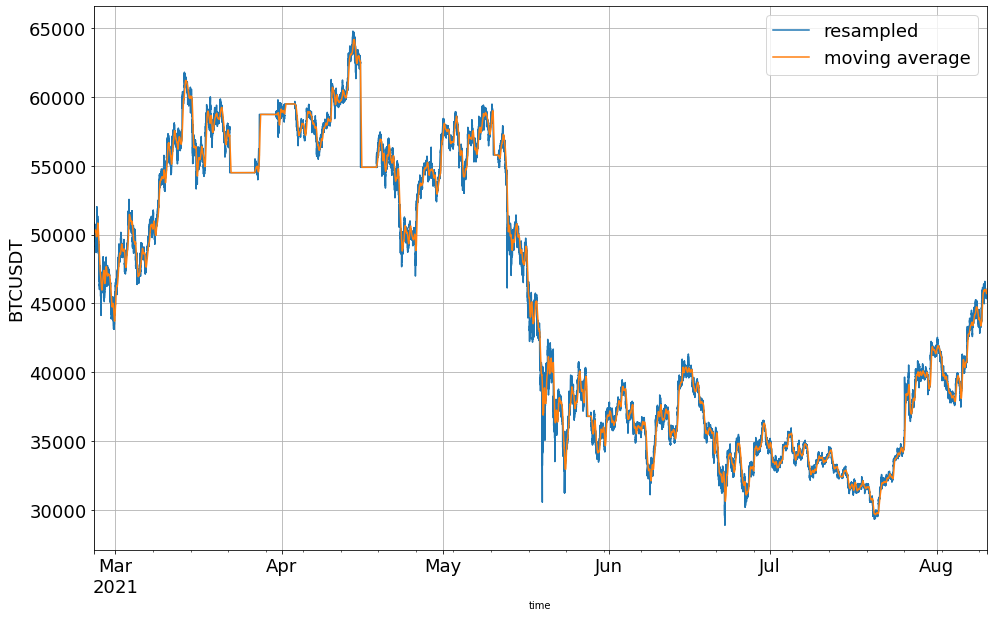

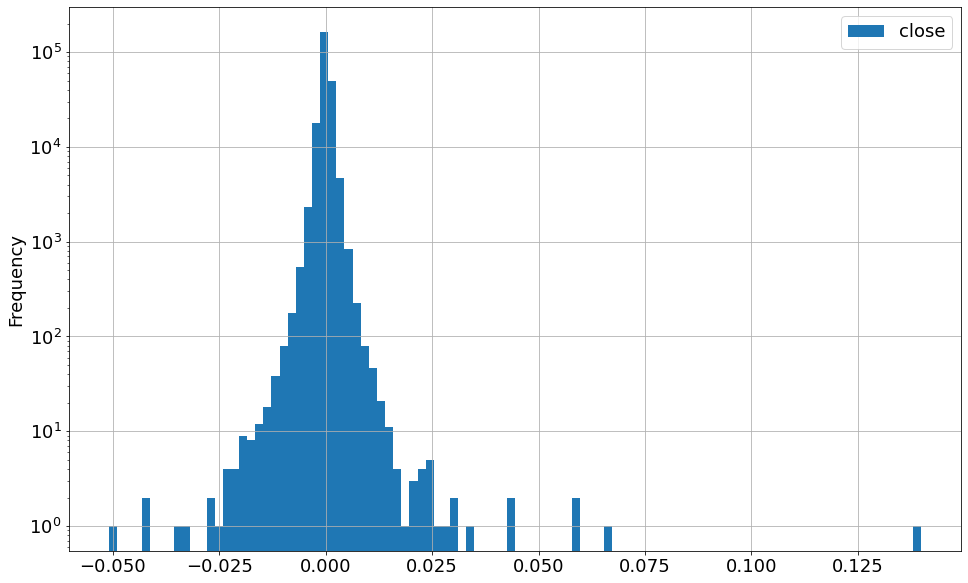

In [148]:
from matplotlib import pyplot as plt

def process_feather(file, mavg_wnd=360):
    feather = pd.read_feather("data/example.feather")
    #redefine the column "time" as index
    feather.index = feather["time"]
    #select the column "close" and resample the resulting time series
    resampled = feather["close"].drop_duplicates().resample("1min").bfill()
    #compute the rolling average over a window of mavg_wnd values
    mavg = resampled.rolling(mavg_wnd).mean()
    #compute returns using shifted time series
    returns = (resampled.shift(1)/resampled)-1
    
    #create plots
    plot_args = {'figsize' : (16,10), 'grid' : True, 'fontsize' : 18, 'legend' : True}
    # init new plot
    plt.figure()
    # plot resampled time series
    resampled.plot(label="resampled", **plot_args)
    # plot moving average of time series
    mavg.plot(label="moving average", **plot_args)
    plt.ylabel("BTCUSDT",fontsize=18)
    plt.legend(fontsize=18)
    # init new plot
    plt.figure()
    # plot histogram of returns with logarithmic y scaling
    # can use hist() or plot(kind="hist") here
    returns.plot(kind="hist", bins=100, **plot_args)
    plt.ylabel("Frequency",fontsize=18)
    plt.yscale("log")
    plt.legend(fontsize=18)
    
#call the defined function
process_feather("data/example.feather")

### Decorators
<br>
<font size="3">
    <b><a href="https://wiki.python.org/moin/PythonDecorators">Decorators</a> help to wrap functions around functions or class methods with a shorter notation, the so-called <i>syntactic sugar</i>, using the @-symbol.</b> Decorators are often using in 3rd party packages for debugging and runtime anaylsis. <br><br>
A popular package to measure the runtime of a function call or an algorithm is <i>timeit</i>. But it is also frequently used in frameworks like Django or Flask for Full-Stack Python where Python-based web applications are developed to denote event callback functions.
</font>
<br><br>

### Examples:

In [145]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
# @my_decorator is just an easier way of saying say_whee = my_decorator(say_whee)
def say_whee():
    print("Whee!")
    
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [146]:
import time
import numpy as np

def benchmark(func):
    def wrapper():
        t1 = time.time()
        func()
        delta_t = time.time() - t1
        print(str(np.round(delta_t,6))+" seconds passed.")
    return wrapper

@benchmark
def something_intensive():
    print("zZzZzZ")
    time.sleep(2)
    
something_intensive()

zZzZzZ
2.000314 seconds passed.


<font size="3">
<b>In Python it's also possible to define decorators with arguments and even use multiple decorators with the same function or class method.</b>
</font>

### Example:

In [147]:
import time

def print_delayed(delay = 1):
    def decorator(function):
        def wrapper(*args, **kwargs):
            out = function(*args, **kwargs)
            for n in range(len(out)+1):
                print(out[:n]+"\r")
                time.sleep(delay)
        return wrapper
    return decorator

@print_delayed(delay = 0.25)
def greeting(name):
    return "Hello, "+name+" !"
    
print(greeting("John Doe"))


H
He
Hel
Hell
Hello
Hello,
Hello, 
Hello, J
Hello, Jo
Hello, Joh
Hello, John
Hello, John 
Hello, John D
Hello, John Do
Hello, John Doe
Hello, John Doe 
Hello, John Doe !
None


### Built-in Decorators
<br>

<font size="3">
    You may checkout the popular built-in decorators in Python, e.g. the <b><a href="https://www.geeksforgeeks.org/python-property-decorator-property/#:~:text=%40property%20decorator%20is%20a%20built,setter%20and%20deleter%20as%20parameters">@property</a></b></i> decorator. <br>
    <b>It makes a class method accessible as if it would be an attribute of the class object.</b>
</font>

### Performance Aspects of Python

<br>
<font size="3">In some cases, like the analysis of big amounts of data or for simulation codes, performance matters. If the acceleration that numpy or pandas offer is still insufficient or specific code needs to be accelerated, Python offers various ways to speed up your code with statically compiled code using <a href="https://cython.org/">Cython</a> and just-in-time (JIT) compilation using <a href="http://numba.pydata.org/">Numba</a>. This <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html">link</a> presents examples to use Cython and Numba with Pandas.<br><br> Another interesting Python module is <a href="https://dask.org/">Dask</a> which offers distributed and/or parallelized processing of large data sets. Dask offers e.g. a <a href="https://docs.dask.org/en/latest/dataframe.html">Dask DataFrame</a> which can be distributed over multiple nodes in a cluster and supports distributed, parallelized data processing using Pandas DataFrame-like objects.<br><br>
In the following, a small introduction on how to use Numba, a just-in-time compiler, is given and you'll see a speed comparison of Numba and the normal Python function.<br><br>

The easiest way to use Numba for a Python function, is to use the specific decorator (decorators were previously introduced in this course):</font>

<font size="3"><b>If Numba is not installed, install the numba module here:</b></font>

In [151]:
%%bash
pip install numba

In [152]:
# import of the decorator from the numba module
from numba import jit

# decorator to indicate that just-in-time compilation is desired
@jit # or @jit(nopython=True), if code is parallelizable use parallel = True
def function(x):
    # your loop or numerically intensive computations
    return x

<font size="3">Whenever a Python function is decorated this way, the Python function will be translated to LLVM code, specific byte code that is executed on a virtual machine, comparable to Java and also with a speed comparable to Java or C(++). The illustration below describes the compilation process:<br><br>
<center>
    <img src="img/llvm.png" width="60%">
</center>
<br>
    <font size="2"><i>Source: <a href="https://github.com/ContinuumIO/gtc2017-numba/blob/master/1%20-%20Numba%20Basics.ipynb">https://github.com/ContinuumIO/gtc2017-numba/blob/master/1%20-%20Numba%20Basics.ipynb</a></i></font><br><br>
First, Python function is taken, optimized and is converted into Numba’s intermediate representation, then after type inference which is like Numpy’s type inference (so python float is a float64), it is converted into LLVM interpretable code. This code is then fed to LLVM’s just-in-time compiler to give out machine code.<br><br>
</font>

### Example:

In [ ]:
from numba import jit, float32
import timeit
import math

# you can explicitly define a function signature
# so that data types are not inferred
@jit(float32(float32,float32))
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

# benchmarks the JIT version
%timeit hypot(3.0, 4.0)
# benchmarks the Python function
%timeit hypot.py_func(3.0, 4.0)
# benchmarks the implementation in the math module
%timeit math.hypot(3.0, 4.0)

<font size="3">For further information, look <a href="https://towardsdatascience.com/speed-up-your-algorithms-part-2-numba-293e554c5cc1">here</a></font>


<br><br><br>
## The object-oriented programming (OOP) paradigm

<br>
<font size="3">
    <b>Python is a multi-paradigm programming language</b>, hence supporting multiple <a href="https://en.wikipedia.org/wiki/Comparison_of_programming_paradigms">programming paradigms</a>. A programming paradigm is a style, philosophy or a set of principles followed in structuring your code and the way to implement its intended functionality. Among the various paradigms, the <a href="https://en.wikipedia.org/wiki/Functional_programming"><b>functional</b></a> and the <a href="https://en.wikipedia.org/wiki/Object-oriented_programming"><b>object-oriented programming (OOP)</b></a> paradigm are the most popular, also in Python.<br>

<b>The functional paradigm</b> focusses on:
<ul>
<li><b>Structuring your code</b>
</li>
<li>
<b>Functions</b> in a mathematical sense <b>with arguments and return values</b>.
</li>
<li>
<b>Scoping allowing for <b>local variables</b> and <b>isolation</b>.
</li>
<li>
<b>Functions allowing the reusability</b> of parts of the code since they <b>should ideally work as black boxes</b>.
</li>
<li>
    <b>Statelessness</b>, hence <b>it shouldn't matter when a function is called.</b> As long as the same input is used, the function should yield the same output. <b>Hence functions are only loosely coupled to data</b> outside of their scope.
</li>
</ul>
<br>
A <b>use case</b> would be for <b>smaller projects or specialized scripts</b> where <b>new features are rather unlikely to be implemented.</b><br>
Examples for other programming languages following this paradigm are C, Fortran and Cobol.
<br>
<br>
<b>The OOP paradigm</b> focusses on:
<ul>
<li><b>Classes defining objects encapsulating functionality</b> which could also exist independently and can be easily ported to other projects.
</li>
<li>
<b>Class objects posess <i>methods</i></b>, functions bound to the object which should act only on the <b><i>attributes</i></b> of the object. The latter are <b>variables bound to the object instance.</b>
</li>
<li>
<b>The data (its state) is strictly bound to the object.</b>
</li>
<li><b>States</b> since the objects (can) store a state in their attributes. The interaction of these objects with the environment takes place via <b><i>special object methods</i></b>, the so-called <b><i>interfaces</i></b>, to avoid direct manipulation of object attributes from outside <b>ensuring data security.</b> <b>Statefulness implies</b> that the <b>execution order of object methods can matter.</b>
</li>
<li>
<b>Classes grouped in modules</b> so that the objects have the specific environments to work in. This allows <b>easy extensibility</b>.
</li>
<li>
<b>Inheritance</b> allowing for a sub-class to inherit methods and attributes from the parent class.
</li>
<li>
<b>The program functionality is realized by object interactions</b>, hence message passing between the objects. 
</li>
</ul>
<br>
A <b>use case</b> is a <v>big project</b> with <b>many collaborators</b> where the <b>task can be easily subdivided</b>, where <b>statefulness</b> is important and <b>new features are likely to be added.</b>
<br>
Examples for other programming languages following this paradigm are Java, C++, Objective-C, Ruby or VB .NET.<br>
<br>

<font size="3">
<b>In summary, the abstract features of object-oriented programming are</b><br>
<ul>
    <li><b>Inheritance:</b> <br>Derivation of class from another class. Hierarchy of classes sharing common attributes and methods. Allows faster development of new features using already existing interfaces.</li><br>
    <li><b>Polymorphism:</b> <br>A function, variable or object can have multiple forms, e.g. the same method could except different number and type of input arguments or the usage of a common interface for objects of different classes.</li><br>
    <li><b>Abstraction:</b><br> A simplified data representation
    </li>
    <br>
    <li><b>Encapsulation:</b><br> Bundling data and methods to hide the internal state and mechanics of an object from the outside. Ensures data safety, portability and maintainability.</li>
</ul>
</font>

### Classes, Objects & Attributes
<br>
<div align="center">
    <img src="img/yoda_meme.png" width="40%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6"><i>https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6</i></a>
</font>
<br>
<br>
<font size="3">
    <b>Classes are blueprints or templates for objects in Python defining the object <i>properties via attributes</i> and <i>behavior via methods</i>.</b><br>
In Python, even the basic builtin datatypes like int, float or str, are objects of a class in the end. Even references to functions. In Python, every entity is and can be treated as object.<br><br>

<font size="4">
<b>A class definition for an object in Python has the following syntax:</b><br><br>
</font>
<font size="3">
<b>class <i>ClassName</i>(<i>ParentClass</i>):</b><br>
<p style="margin-left: 20px"><b>def __init__(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>public_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>_protected_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>__private_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def public_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def _protected_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def __private_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font><br>
<b>[return <b><i>value</i>]</b></p>
<br><br>
    
<b>where the private, builtin method <i>__init__</i> is the so-called <i>constructor</i> of the class object which is invoked when a new class object is <i>instantiated</i> (created).</b><br>
<b>A function or method does not need to return a value. If no return statement is present, a NoneType object will be returned. However, the function or method needs to contain at least one statement (or a <i>pass</i>).</b><br>  
<b>The class naming convention is to start with a capital letter and may use only here camel case, hence the alternating use of small and capital letters to create seperation, e.g. ClassName.</b><br><br>
<font size="4">
<u><b>Attribute and Method Naming Convention:</b></u>
</font>
<font size="3">
<br>
<br>
<b>Methods or attributes</b>
<ul>
    <li><b>without leading underscore</b> as name prefix are <b>public.</b></li>
    <li><b>with one leading underscore</b> as name prefix are <b>protected.</b></li>
    <li><b>with two leading underscores</b> as name prefix are <b>private.</b></li>
    <li><b>with two underscores as</b> name <b>prefix and suffix</b> are <b>private, built-in methods.</b></li>
</ul>
<b>In contrast to other programming languages, this is <u>just a notational convention</u> and by no means a real access protection!</b><br>
<b>Protected and private methods and protected attributes can be accessed anyway!</b><br> Private attribute access is possible using the built-in dictionary representation of an object: <i>obj.__dict__[attribute_name]</i>.<br><br>
<b>When you attempt to access a private attribute, an error is thrown, but it can be accessed anyway with a trick.</b>
</font><br><br>
    

### Example:

In [50]:
#required import to use type hinting with custom class objects are return value data type
from __future__ import annotations

# class definition
# the class "Dog" inherits from class "object"
# every class inherits from that class as default
# naming convention for class names is to start with a capital letter
class Dog(object):
    
    # the constructor of the class is a private, built-in method
    # 
    def __init__(self, name : str, age : int) -> Dog:
        # a private attrbute which should not be changed from outside the object
        self.__name = name
        # a protected attrbute which should not be changed from outside the object
        self._age = age
        # a public attrbute which can be accessed/changed from outside the object
        self.favorite_food = "Pizza"
        self.favorite_toy = "Bone"
        self.has = None
        self.__energy = 5
        
    # overload the builtin method __str__ 
    # for an implicit string representation of the object
    #def __str__(self) -> str:
    #    return "This is the dog "+self.__name+". I am "+str(self._age)+" years old."
        
    # a public class method definition with type hints
    def bark(self, volume : int, pitch : int, duration : int) -> str:
        # assemble string
        bark_str_prefix = ["bo","ba","bi"]
        bark_str_letter = ["o","a","i"]
        bark_str_suffix = "rk"
        bark_str = bark_str_prefix[pitch]
        bark_str += bark_str_letter[pitch]*duration
        bark_str += bark_str_suffix
        if volume > 50:
            bark_str = str.upper(bark_str)
            
        if self.__energy <= 0:
            return self.__sleep()
        else:
            self.__energy -= 1
            return bark_str
    
    # a public class method
    # implements an interaction between the objects of class Dog and Ball
    def bite(self, obj):
        if isinstance(obj, Ball):
            obj.deflate()
    
    # a public class method
    def retrieve(self, obj):
        self.has = obj
        return obj
    
    # a private class method - method name starts with two underscores
    def __sleep(self):
        self.__energy = 5
        return "zZzZ"
    
    # setter - method to set private attribute content
    def set_name(self, new_name):
        self.__name = new_name
    
    # getter - method which yields private attribute content
    def get_name(self):
        return self.__name
    
    # getter - method which yields private attribute content
    def get_energy(self):
        return self.__energy

# another class definition
class Ball(object):
    # constructor definition with type hints
    def __init__(self, size : float, color : str, weight : float, inflated : bool) -> Ball:
        self.__color = color
        self.__size = size
        self.__weight = weight
        self.__inflated = inflated
        
    # setter - method to set private attribute content
    def deflate(self) -> None:
        self.__inflated = False

    # setter - method to set private attribute content
    def inflate(self) -> None:
        self.__inflated = True
        
    # setter - method to set private attribute content
    def set_inflated(self, value : bool) -> None:
        self.__inflated = value

    # getter - method which yields private attribute content
    def is_inflated(self) -> bool:
        return self.__inflated
    
    def print_status(self):
        out_str = "The ball is "+self.__color+" and "+str(self.__size)+\
                    " m big and weights "+str(self.__weight)+" kg and is "
        if self.__inflated:
            out_str += "inflated."
        else:
            out_str += "not inflated."
        print(out_str)
        return out_str

# instantiate new "Dog" objects
dog1 = Dog("Bello", 0)
dog2 = Dog("Doggo", 2)
# instantiate new "Ball" object
ball1 = Ball(0.3, "red", 0.2, True)

# print types
print("Object types:")
print("type(dog1)="+str(type(dog1)))
print("type(dog2)="+str(type(dog2)))
print("type(ball1)="+str(type(ball1))+"\n")

# attempt to print Dog-objects
# results in standard string representation for generic objects
# since we have not overloaded the built-in method __str__
# which takes care of the conversion of the object to a string representation
print("Objects implicitly converted to strings:")
print(dog1)
print(dog2)
print(ball1)
print("")

Object types:
type(dog1)=<class '__main__.Dog'>
type(dog2)=<class '__main__.Dog'>
type(ball1)=<class '__main__.Ball'>

Objects implicitly converted to strings:



<font size="3">
When you attempt to print objects of user-defined classes, Python tries to implicitly convert these objects to a string representation.<br><br>
<b>Since <i>Dog</i> and <i>Ball</i> are user-defined classes, Python cannot know what an adequate string representation of that object would be. Therefore, an object is converted to a string of that form as default.</b><br><br>
We can invoke public object methods without any problem. An object method can change attributes of the object, hence an object can have a certain state.
</font>

In [ ]:
# invoke public object methods
print("Results of invoked object methods:")
print("----------------------------\n")
print("dog1.bark(40, 0, 1) = "+str(dog1.bark(40, 0, 1)))
print("dog1.bark(50, 1, 1) = "+str(dog1.bark(50, 1, 1)))
print("dog1.bark(60, 1, 1) = "+str(dog1.bark(60, 1, 1)))
print("dog1.bark(60, 1, 10) = "+str(dog1.bark(60, 1, 10)))
print("dog1.retrieve(ball1) = "+str(dog1.retrieve(ball1)))
ball1.print_status()
print("")

# invoke method which modifies the objects attributes
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking ball1.deflate():")
ball1.deflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("")

<font size="3">
The statefullness of objects in Python is also demonstrated by interaction between different object types.<br>
<b>In this example, an object of class Dog invokes a method of another object of a different class, here Ball.</b>
</font>

In [ ]:
print("Statefullness of objects:")
print("-------------------------")
print("If method bark() was invoked 5 times (not necessarily sequentially),")
print("the private method __sleep() of the Dog object is invoked.")
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("")

# interaction between an object of class Dog and of class Ball
print("Interaction between objects:")
print("----------------------------\n")
print("After invoking ball1.inflate():")
ball1.inflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking dog1.bite(ball1):")
dog1.bite(ball1)
print("ball1.is_inflated() = "+str(ball1.is_inflated()))

print("")

# access public object attribute directly
print("dog1.has = "+str(dog1.has))
print("\n")

# attempt to access private object attribute (discouraged anyway, use setter/getter methods instead !)
print("Attempt to access private attribute throws an error (encapsulation):")
print("dog1.__name = "+str(dog1.__name))
# yields an AttributeError

In [19]:
# attempt to invoke private object method
print("Attempt to invoke private method throws an error (encapsulation):")
print("dog1.__sleep()="+dog1.__sleep())

Attempt to invoke private method throws an error (encapsulation):


AttributeError: 'Dog' object has no attribute '__sleep'

<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b>
    Define a class <i>Sheep</i> with <b>private</b> attributes <i>color, name, age, sheared</i> and the <b>public</b> attribute <i>id</i>. Implement <b>setters</b> and <b>getters</b> for the private attributes. Implement a <b>public</b> method <i>shear</i> switching the private attribute <i>sheared</i>. Implement a method <i>_ _str _ _</i> for the implicit string representation of the object, so that Python knows what to do when you attempt to print a Sheep object. Then try to print the Sheep object. </div><br>
<b>Try it yourself:</b></font>

### Example Solution:

In [21]:
from __future__ import annotations
from typing import List
import numpy as np
import copy

class Sheep(object):
    def __init__(self, color : str, name : str, age : int, sheared : bool) -> Sheep:
        self.__color = color
        self.__name = name
        self.__age = age
        self.__sheared = sheared
        self.children = []
        
    def set_color(self, color : str):
        self.__color = color
    def get_color(self) -> str:
        return self.__color
    def set_name(self, name : str):
        self.__name = name
    def get_name(self) -> str:
        return self.__name
    def set_age(self, age : int):
        self.__age = age
    def get_age(self) -> int:
        return self.__age
    def get_children(self) -> List[Sheep]:
        return self.children
    def is_sheared(self) -> bool:
        return self.__sheared
    def shear(self) -> None:
        #if self.sheared:
        #    self.__sheared = False
        #else:
        #    self.__sheared = True
        self.__sheared = not self.__sheared
        
    def give_birth(self, n) -> List[Sheep]:
        colors=["black","white","red","blue"]
        for i in range(n):
            rand_color = np.random.randint(0,len(colors))
            self.children.append(Sheep(colors[rand_color],str(np.random.randint(0,1000)),0,False))
        return copy.deepcopy(self.children)
        
    def __str__(self) -> str:
        return "This is a sheep of "+self.__color+" color and it is "+str(self.__age)+" years old."

sheep1 = Sheep("black","Dolly",3,False)
print(sheep1)
childrens = sheep1.give_birth(3)
print(sheep1.get_children())
print(sheep1.is_sheared())
sheep1.shear()
print(sheep1.is_sheared())
sheep1.shear()
print(sheep1.is_sheared())

# although the list of children was returned by sheep1.give_birth(3)
# the elements in childrens, the new sheeps objects, are not real deep copies, but references
# to the old objects in sheep1.__children

# not a real copy
# arr1 = np.array([1,2,3,4])
# arr2 = arr1

# this becomes obvious if the object hashes are compared
# a hash is a (in the best case) unique string or number assigned
# to an input as a result of a (cryptographic) function
print(childrens[0].__hash__)
print(sheep1.children[0].__hash__)

This is a sheep of black color and it is 3 years old.
[<__main__.Sheep object at 0x7f73d0550310>, <__main__.Sheep object at 0x7f73d054ef40>, <__main__.Sheep object at 0x7f73d054ed00>]
False
True
False
<method-wrapper '__hash__' of Sheep object at 0x7f73d054ed90>
<method-wrapper '__hash__' of Sheep object at 0x7f73d0550310>


### Inheritance & Method prototyping, overriding and overloading
<br>
<font size="3">
    <b>Inheritance is one of the key features of the OOP paradigm.</b><br><br>
    <b>Inheritance allows a child-class or subclass to inherit attributes and methods from one or more parent- or super classes.</b> The figure illustrates this circumstance:<br><br>
    
</font>
<div align="center">
<img src="img/inheritance2.jpg" width="40%">
</div>
<br>
<font size="2"><i>Source: </i><a href="https://www.startertutorials.com/blog/inheritance-polymorphism-python.html">https://www.startertutorials.com/blog/inheritance-polymorphism-python.html</a></font><font size="3">
<br><br>

Inheritance allows to define a hierarchy of classes sharing the same base attributes and methods (interfaces). It can facilitate the implementation of new features in your code.<br><br> Inheritance is very often required when you work with big Python frameworks. There you write your own class by inheriting from a provided (abstract) class to comply with the interfaces or methods expected by the framework environment.<br><br>
    <b>Multiple inheritance</b> is possible in Python, but only indirect via <a href="https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851"><b>Method Resolution Order</b> (MRO)</a>, hence the object method are called in a specific order. An example is given below. <br><br>
<b>In particular, method prototyping, overriding and overloading is applied in that case.<br><br>
Method prototypes are simply empty methods defined in the parent class, hence this class is called <i>abstract</i>. <br><br>This prototype method is then overridden by redefining a method with the <u>same name</u> in the sub class.</b><br><br>
    <b>Method overloading</b> is also called <b><i>polymorphism</i></b> since multiple class methods of the <u>same name</u> can be defined, but accepting different numbers of arguments and types. Depending on which <i>signature</i> (number and data types of expected method arguments) of the method fits, the specific method in that case is selected and executed.<br><br>
<b>In contrast to other programming languages like e.g. Java, a builtin implementation of polymorphism is not available in Python, hence it is not possible to define multiple methods of the same name, but accepting different number of arguments.</b> Polymorphism can only be implemented indirectly by default values for (keyword) arguments or variable number of arguments.
</font>

### Example:

In [27]:
# let's use our class Dog from the example above
# let's define a new class InuShiba which inherits from class Dog
class InuShiba(Dog):
    
    # the constructor of the class Dog is overridden here
    def __init__(self, name : str, num_of_memes_published : int, age : int) -> InuShiba:
        
        # in order to have the same attributes like the parent or super class Dog
        # invoke constructor of super class, then define additional attributes
        
        # instead of using the explicit class name here, better use the super() method!
        super().__init__(name, age)
        #Dog.__init__(self, name, age)
        self.__num_of_memes_published = num_of_memes_published
    
    # a new method only InuShiba objects have
    def publish_meme(self):
        self.__num_of_memes_published += 1
        
    # the method bark is overloaded, since the class Dog already has a method bark, but
    # with a different signature: the bark method of Dog expects 3 parameters, 
    # this bark method does not.
    def bark(self, volume=100, pitch=1, duration=10):
        return "Barking in Japanese."

special_dog = InuShiba("Hideki", 2E100, 99)
# inspecting the attributes of a InuShiba object, it in fact shares the same attributes as a Dog object
# but it has additional attributes
print(special_dog.__dict__)
# inspecting the methods of a InuShiba object, it shares in fact the same methods as a Dog object
# but it has additional methods
print(special_dog.__dir__())

# demonstration of method overloading / polymorphic methods
print(special_dog.bark())
print(special_dog.bark(100, 1, 10))
print("")

print(Dog("a",1) == Dog("b",1))
# need to override __add__ to do that
#print(Dog("a",1) + Dog("b",2))
print(dog1.bark(100,1,10))
# invoking bark of a Dog object, throws an exception when invoked without parameters
dog1.bark()

{'_Dog__name': 'Hideki', '_age': 99, 'favorite_food': 'Pizza', 'favorite_toy': 'Bone', 'has': None, '_Dog__energy': 5, '_InuShiba__num_of_memes_published': 2e+100}
['_Dog__name', '_age', 'favorite_food', 'favorite_toy', 'has', '_Dog__energy', '_InuShiba__num_of_memes_published', '__module__', '__init__', 'publish_meme', 'bark', '__doc__', '__str__', 'bite', 'retrieve', '_Dog__sleep', 'set_name', 'get_name', 'get_energy', '__dict__', '__weakref__', '__repr__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
Barking in Japanese.
Barking in Japanese.

False
BAAAAAAAAAAARK


TypeError: bark() missing 3 required positional arguments: 'volume', 'pitch', and 'duration'